In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\chetr\\Documents\\class materials\\SECOND SEMESTER\\PROJECTS\\8. Visibility\\jfk_weather_cleaned.csv")

In [3]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [4]:
data.shape

(75083, 11)

In [5]:
data.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [6]:
data.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


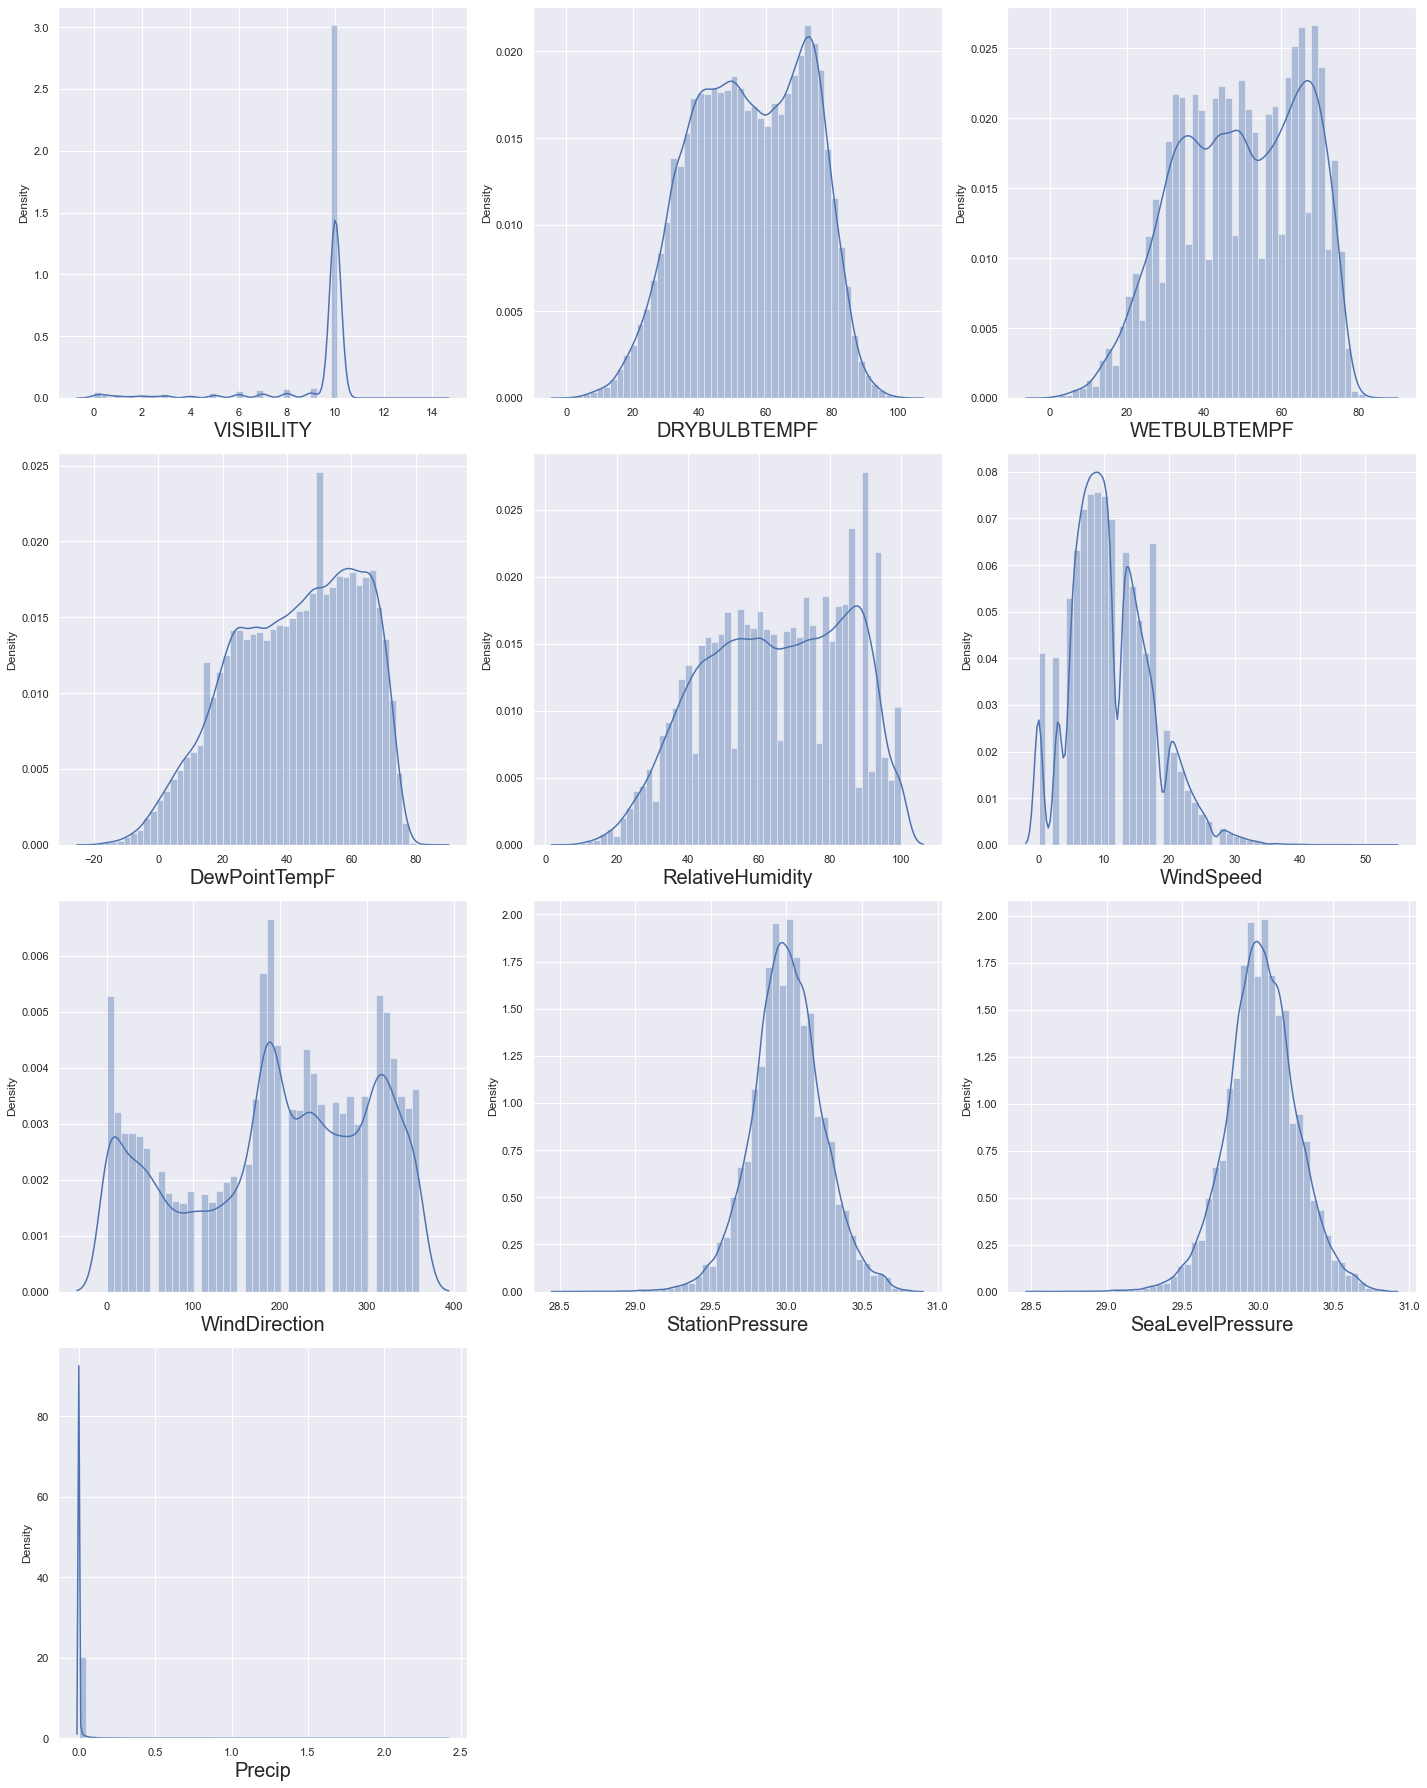

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

we will use algorithms which do not require normal distribution such as decision tree and XGBoost. Usually infomation based (DT,Random Forest) and probability based(Naive bayes,bayesan network) dont require scaling

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. Let's drop this column.

In [9]:
X = data.drop(['DATE','VISIBILITY'],axis=1)
y = data['VISIBILITY']

In [10]:
X.head()

,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,33,32,31,92,0,0,29.97,29.99,0.01
1,33,33,32,96,0,0,29.97,29.99,0.02
2,33,33,32,96,0,0,29.97,29.99,0.02
3,33,33,32,96,0,0,29.95,29.97,0.02
4,33,32,31,92,0,0,29.93,29.96,0.02


In [11]:
y.head()

0    6.0
1    6.0
2    5.0
3    5.0
4    5.0
Name: VISIBILITY, dtype: float64

<AxesSubplot:>

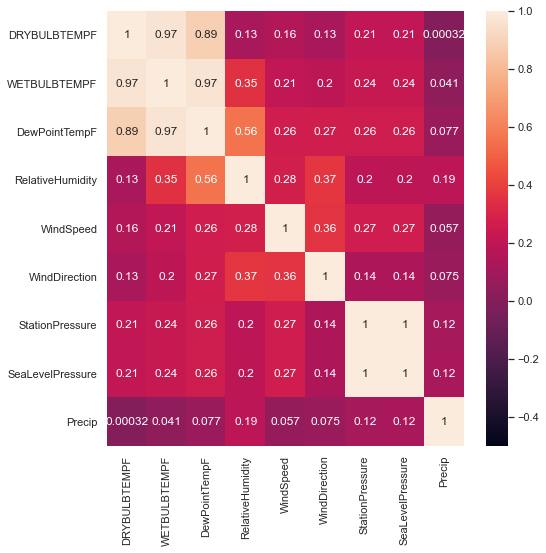

In [12]:
plt.figure(figsize=(8,8))
plt_data =X
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom

#     plot.xlabel(column,fontsize=20)
#     #plt.ylabel('Salary',fontsize=20)
#     plot.ylabel("Calories")
#     plotnumber+=1

There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [13]:
X_ = X.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

<AxesSubplot:>

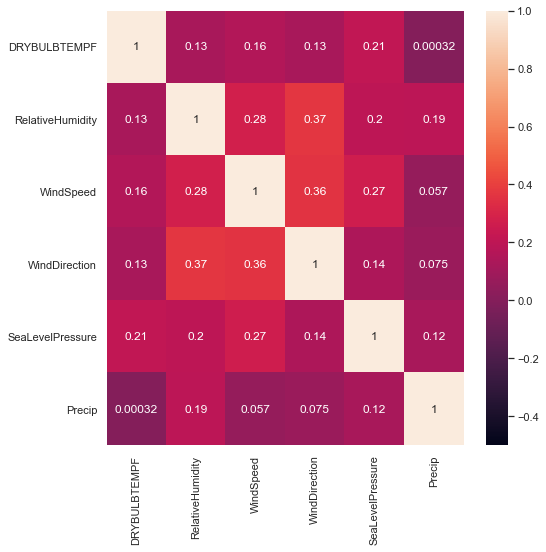

In [14]:
plt.figure(figsize=(8,8))
plt_data =X_
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)


Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dtree=DecisionTreeRegressor(criterion="mse")

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred=dtree.predict(X_test)

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9992822361957906


In [20]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.33541794403517355


clearly we have low bias and high variance. It is an overfitting problem

In [21]:
## so now we shall apply CROSS-VALIDATION, In CV automatically data gets divide into test and train so we avoid X_train,y_train
## Instead apply just X,y

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [22]:
score.mean() ## Even after applying CROSS VALIDATION the accuracy (i.e. mean of 5 times iterated R score seems 82%)

0.08210753743721191

Hyper parameter Tuning

In [23]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [27]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [30]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
random_search.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
random_search.best_score_

-2.9510818569011352

In [33]:
predictions=random_search.predict(X_test)

<AxesSubplot:xlabel='VISIBILITY', ylabel='Density'>

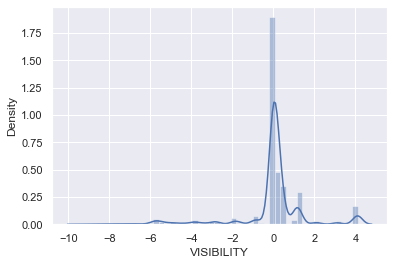

In [34]:
sns.distplot(y_test-predictions)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8035345675172626
MSE: 2.9494872524222058
RMSE: 1.7174071306542913


In [41]:
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6312088050314466
MSE: 3.2886375041312124
RMSE: 1.813460091684185
